# FACTORS DETERMINING TERM DEPOSIT PURCHASES

## Introduction
Banks exist to provide monetary services to people and to make profit.  With that in mind, banks devote significant resources and activity to gain capital.  One way banks do this is to engage in direct marketing campaigns to sell and provide services.  This data set contains result of a Portuguese Bank direct marketing campaign to sell term deposits.  

## Problem Statement
The first objective was to classify if the client would subscribe to term deposit or not and to determine which variables have the highest influence on term deposit purchases

 ## Data 
 The Data Set is the Portuguese Bank Marketing Data Set in the University of California, Irvine (UCI) Machine Learning Repository located at the following URL:  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.  The data is a result of a direct marketing campaign performed by a Portuguese banking institution to sell term deposits/certificate of deposits.  The banking institution made phone calls to potential buyers from May 2008 to November 2010.  Often, more than 1 contact to the same client was required to assess whether a client would place an order.  The full data set, bankadditional-full.csv, was used. 
There are 41,188 observations and 21 Variables in the Data Set.  There are 10 continuous measure variables and 10 categorical variables.  The target response (y) is a binary response indicating whether the client subscribed to a term deposit or not.  ‘Yes’ (numeric value 1) indicated the client subscribed to a term deposit.  ‘No’ (numeric value 0) indicated the client did not subscribe to a term deposit.The variables are broken into 4 categories:  Client Data, Last Contact Info, Other, and Social and Economic Variables. 

In [111]:
#Installing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

pd.options.display.max_columns=500
pd.options.display.max_rows=500

In [112]:
#Reading data
data=pd.read_csv('D:/Praxis/Projects/Classification(P1)/bank-additional-full.csv',sep=';')

In [113]:
#Look of data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [114]:
# take a look at the type, number of columns, entries, null values etc..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [115]:
#Checking for null values in each columns
data.isnull().sum()
data.shape

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

(41188, 21)

##### There are no missing continuous values in this data set.  Thus, no imputation was necessary

# EDA and Data Cleaning

The variables are broken into 4 categories: Client Data, Last Contact Info, Other, and Social and Economic Variables.
I have performed EDA on each category seperately to get a better picture
#### EDA-Part 1

In [116]:
bank_client = data.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

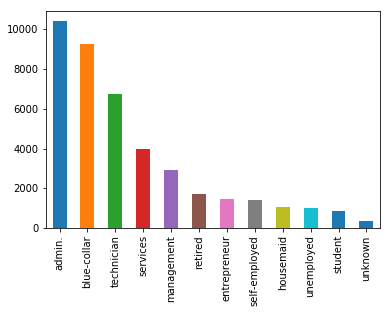

In [117]:
#Checking for unique job titles and their counts in data
bank_client['job'].value_counts()
pd.value_counts(bank_client['job']).plot.bar()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

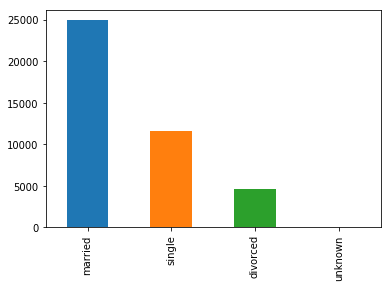

In [118]:
#Checking for counts of different marital status in data
bank_client['marital'].value_counts()
pd.value_counts(bank_client['marital']).plot.bar()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

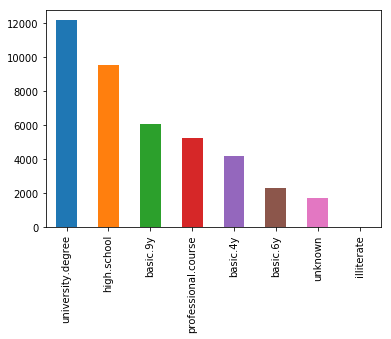

In [119]:
#Checking for Educationa;l background unique counts
bank_client['education'].value_counts()
pd.value_counts(bank_client['education']).plot.bar()

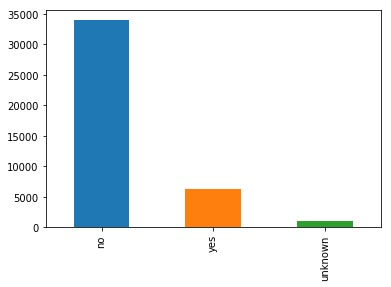

In [120]:
#Checking for loan status of clients
a=bank_client['loan'].value_counts()
a.plot.bar()

#### Distribution of variables

<Figure size 1800x720 with 0 Axes>

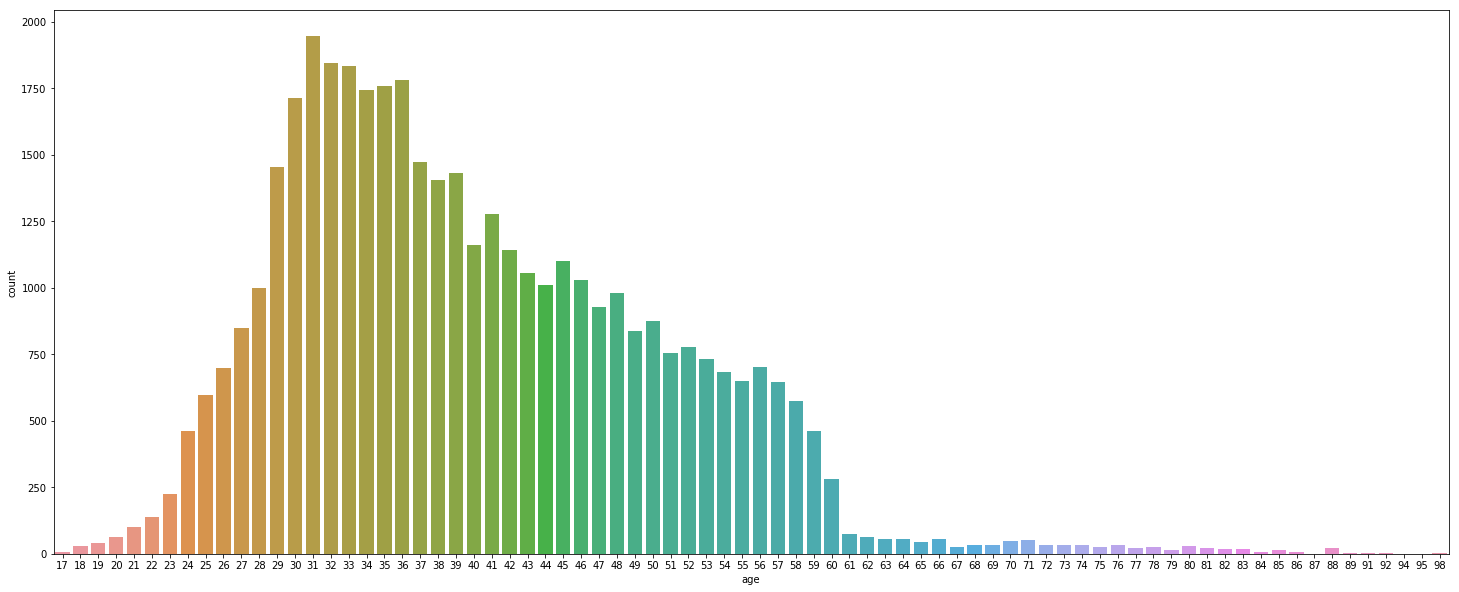

<Figure size 1800x720 with 0 Axes>

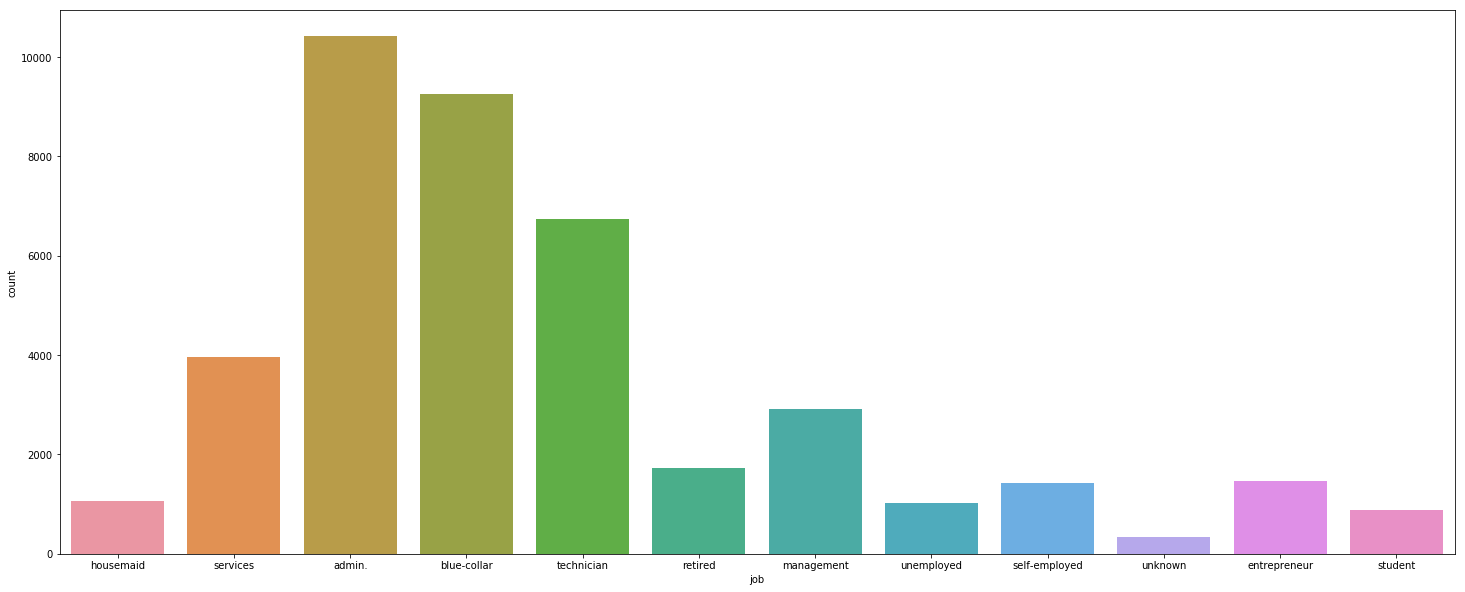

<Figure size 1800x720 with 0 Axes>

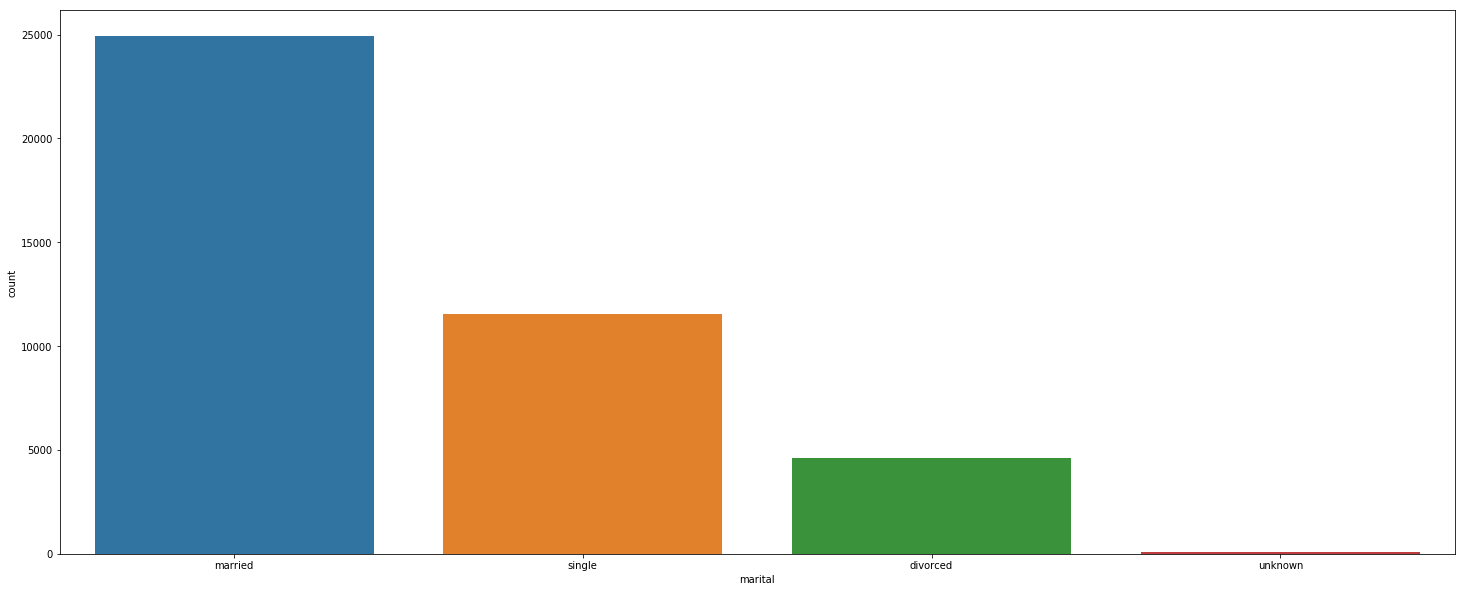

<Figure size 1800x720 with 0 Axes>

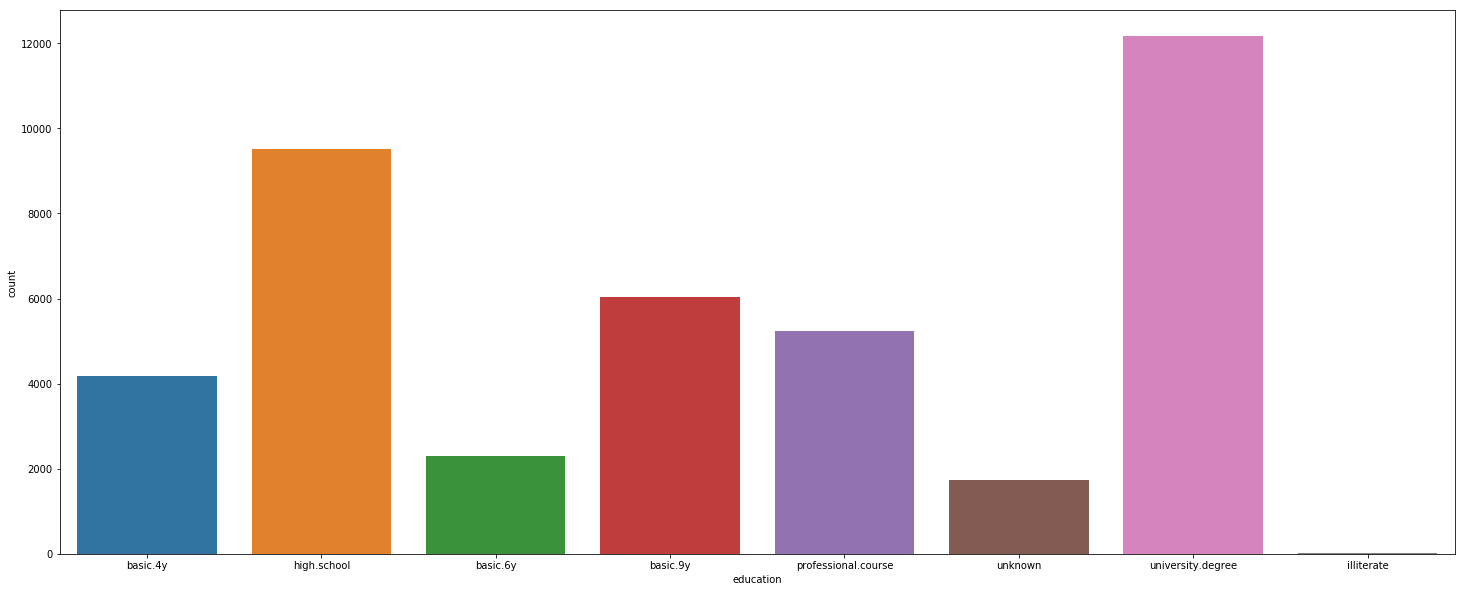

<Figure size 1800x720 with 0 Axes>

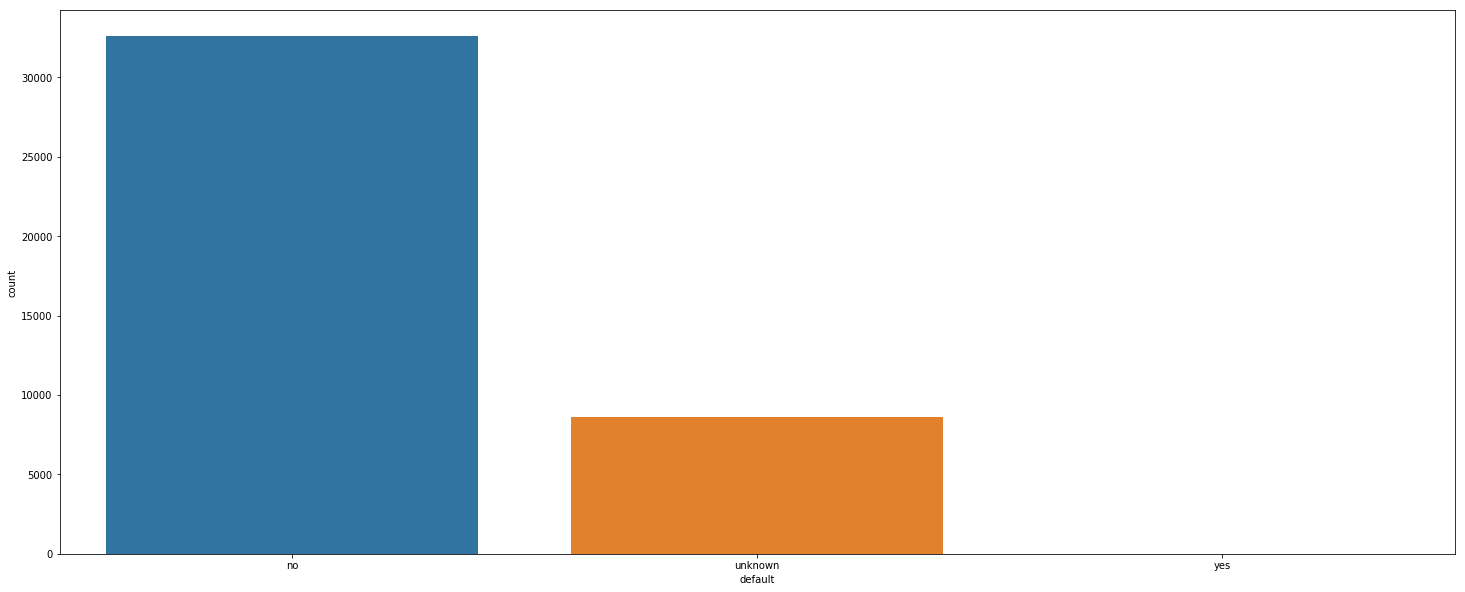

<Figure size 1800x720 with 0 Axes>

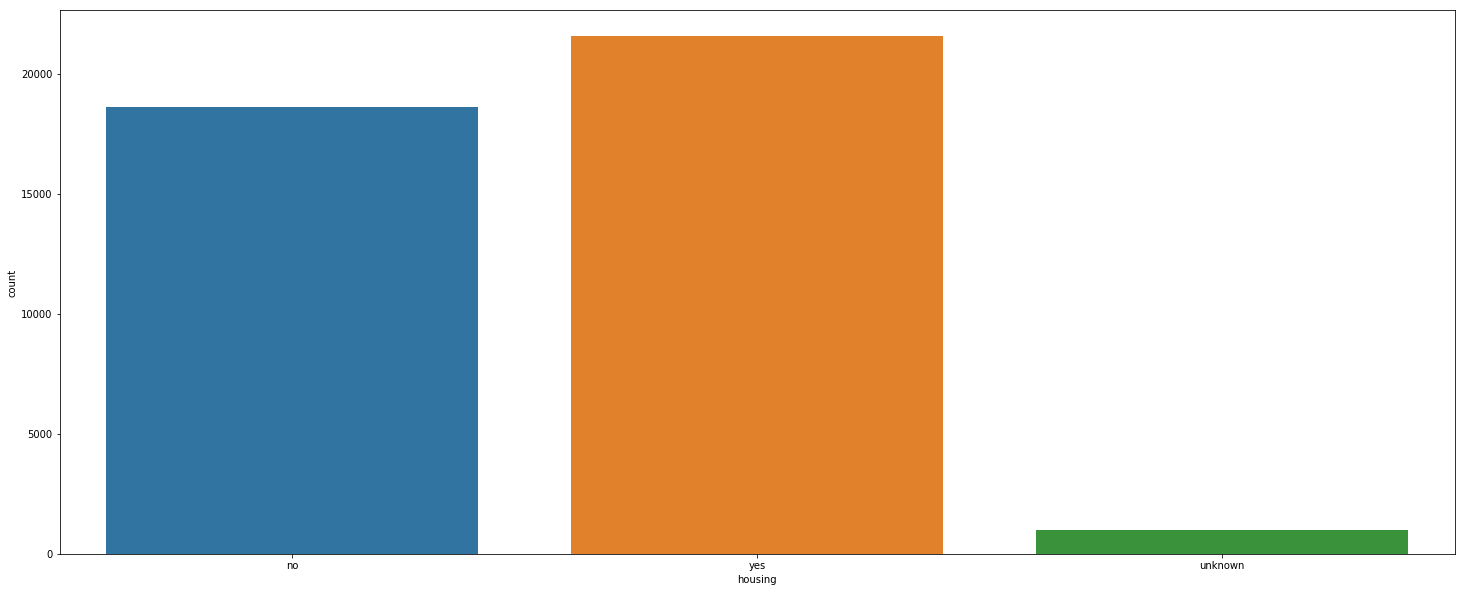

<Figure size 1800x720 with 0 Axes>

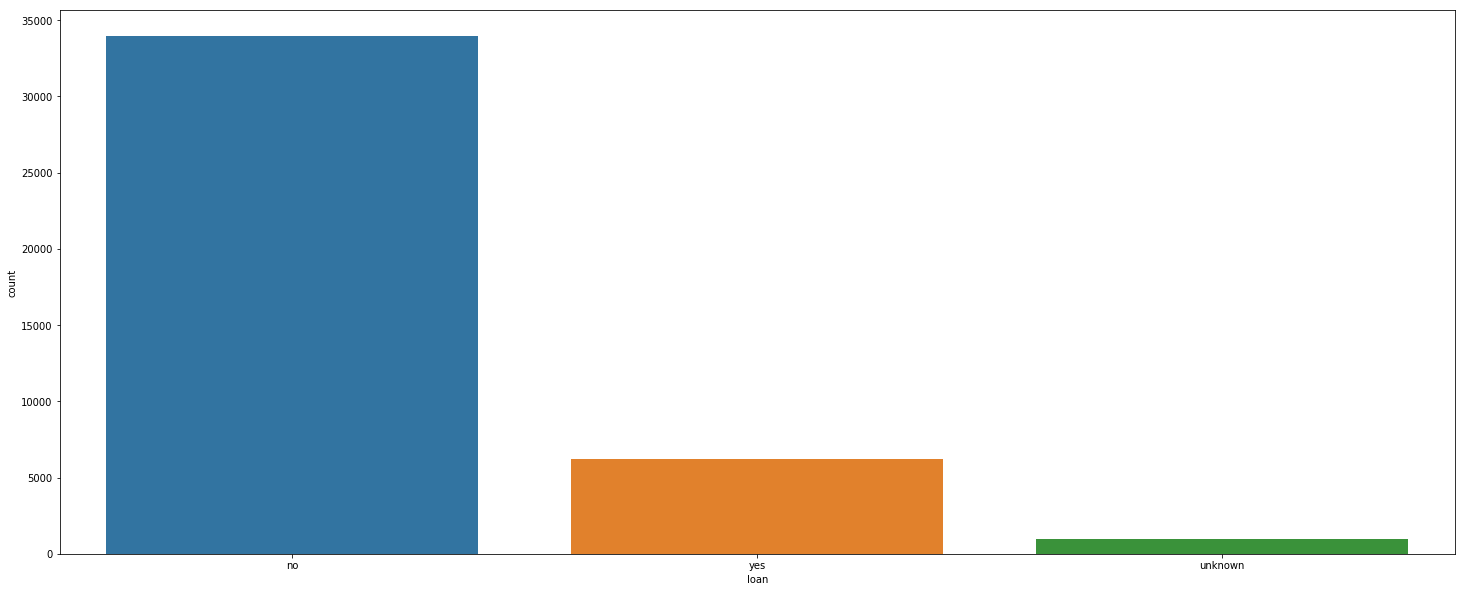

In [121]:
for i in bank_client.columns:
        plt.figure(figsize=(25,10))
        sns.countplot(x = i, data = bank_client);
        plt.show();

###### Analysing Age Column

In [122]:
print("Minimum Age :", bank_client['age'].min())
print("MAximum Age :",bank_client['age'].max())

Minimum Age : 17
MAximum Age : 98


Text(0.5,0,'Age')

Text(0,0.5,'Count')

Text(0.5,1,'Age Count Distribution')

Text(0.5,0,'People Age')

Text(0,0.5,'Age')

Text(0.5,1,'Age Distribution')

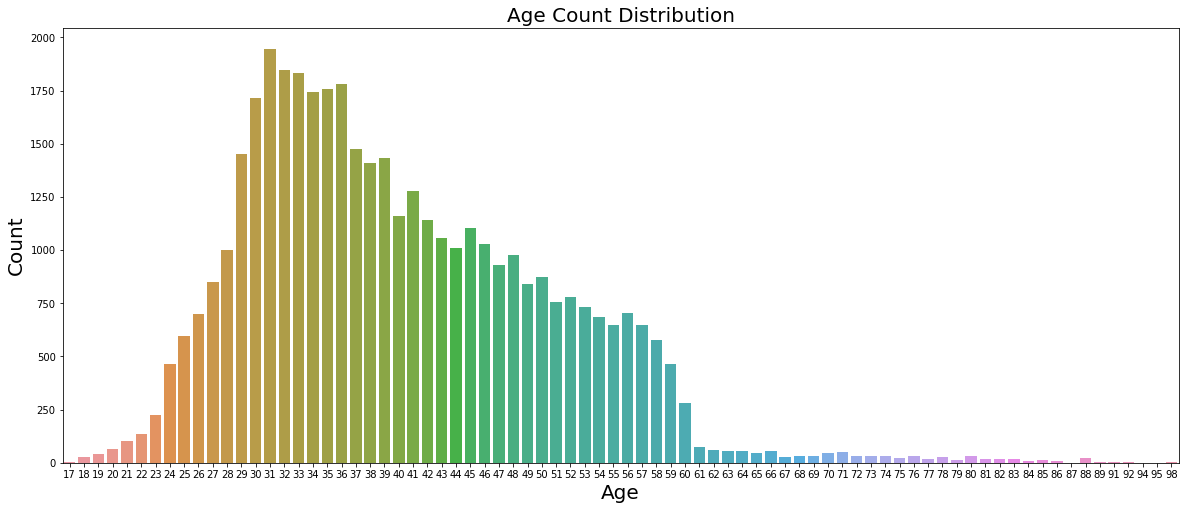

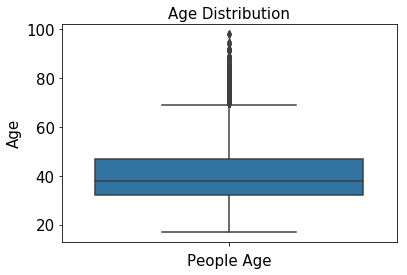

In [123]:
#Checking for distribution of age through sns plots
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Age Count Distribution', fontsize=20)
#Box Plot for visualising Outliers
fig,ax1=plt.subplots()
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

##### Outlier Detection

In [124]:
#Checking for summary of age column
bank_client['age'].describe()
#Calculating Quartiles and detecting Outliers
Q1=bank_client['age'].quantile(q = 0.25)
Q3=bank_client['age'].quantile(q = 0.75)

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [125]:
upper=Q3+1.5*(Q3-Q1)
lower=Q1-1.5*(Q3-Q1)

In [126]:
print('Ages above: ', upper , 'are outliers')
print('Ages below: ', lower , 'are outliers')
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Ages above:  69.5 are outliers
Ages below:  9.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


Text(0.5,0,'Job')

Text(0,0.5,'Count')

Text(0.5,1,'Job Count Distribution')

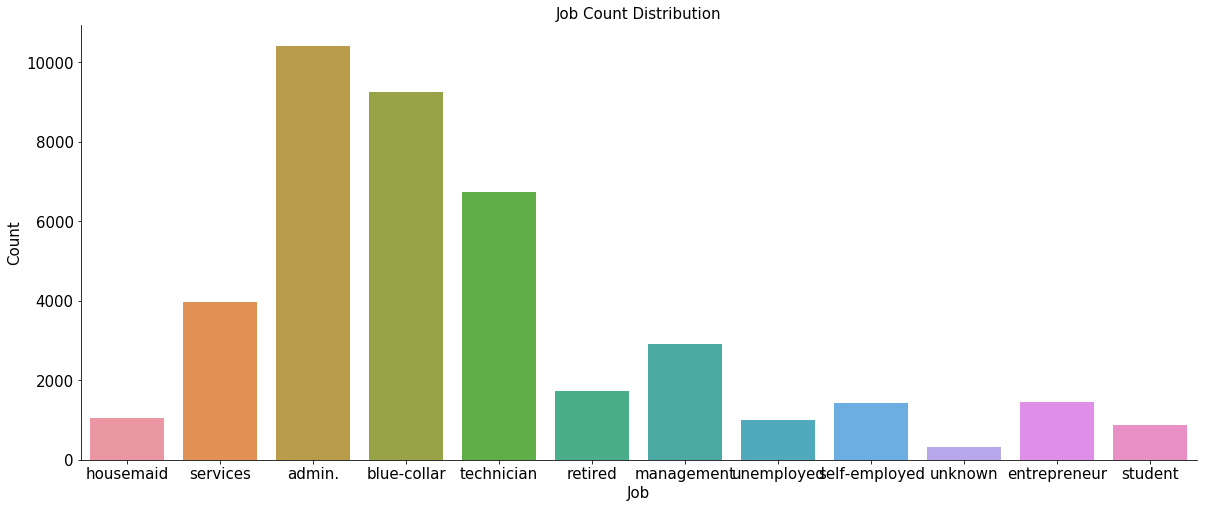

In [127]:
#Plotting JOB
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Text(0.5,1,'Purchase Frequency for Job Title')

Text(0.5,0,'Job')

Text(0,0.5,'Frequency of Purchase')

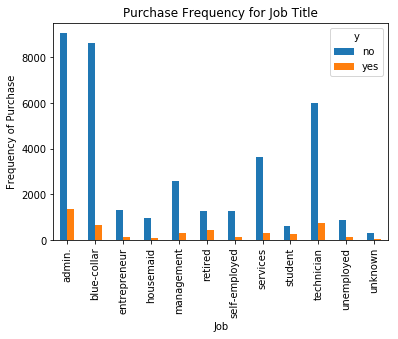

In [128]:
pd.crosstab(bank_client.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

#### Label Encoding for Bank-Client data - Categorical Variable

In [129]:
cat_vars=['job','marital','education','default','housing','loan']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_client[var], prefix=var)
    data1=bank_client.join(cat_list)
    bank_client=data1
cat_vars=['job','marital','education','default','housing','loan']
data_vars=bank_client.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [130]:
bank_client_final=bank_client[to_keep]
bank_client_final.columns.values

array(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes'], dtype=object)

In [131]:
#Label Encoding
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
#bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
#bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
#bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
#bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
#bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 



### Feature Engineering 
Performed for Age Column

In [132]:
bank_client_final['age'].nunique()

78

In [133]:
#function to create group of ages, this helps because we have 78 different values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [134]:
age(bank_client_final)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
6,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
7,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [135]:
bank_client_final.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


### EDA- Part 2

In [136]:
#Slicing
bank_related = data.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

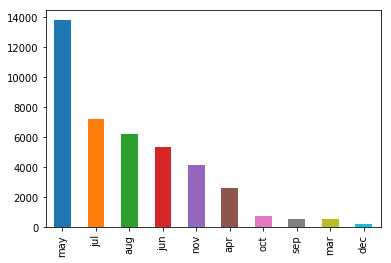

In [137]:
#Checking and Plotting for Value counts in month
m=bank_related['month'].value_counts()
m
m.plot.bar()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


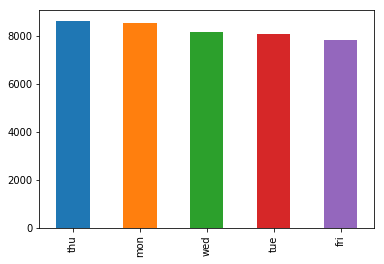

In [138]:
#Checking and plotting for calls made in which day of week
w=bank_related['day_of_week'].value_counts()
print(w)
w.plot.bar()

Text(0.5,0,'Calls')

Text(0,0.5,'Duration')

Text(0.5,1,'Calls Distribution')

Text(0.5,0,'Duration Calls')

Text(0,0.5,'Occurence')

Text(0.5,1,'Duration x Ocucurence')

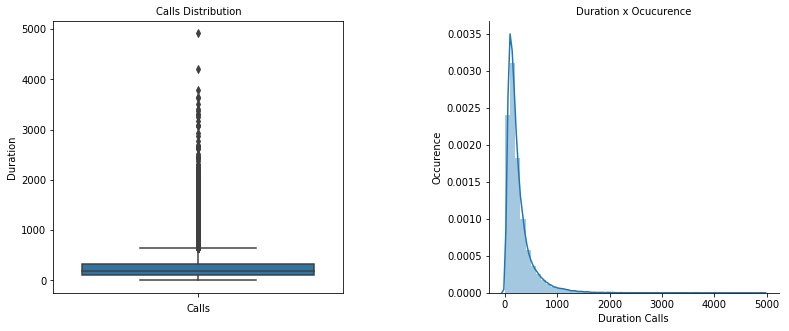

In [139]:
#Plots for call durations distribution and occurence
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

In [140]:
#Checking for unique ways of contacting and there counts
print("Kind of Contact: \n", bank_related['contact'].unique())
c=bank_related['contact'].value_counts()
print(c)

Kind of Contact: 
 ['telephone' 'cellular']
cellular     26144
telephone    15044
Name: contact, dtype: int64


#### Outlier Detection

In [141]:
#Checking for Summary of duration of call
bank_related['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [142]:
#Detecting Outliers
# Quartiles
Q1=bank_related['duration'].quantile(q = 0.25)
Q3=bank_related['duration'].quantile(q = 0.75)

IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR

print('Duration calls above: ',uw,'are outliers')
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Duration calls above:  644.5 are outliers
Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


#### Label Encoding

In [143]:
#Label Encoding
#labelencoder_X =preprocessing.LabelEncoder()
#bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
#bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
#bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

cat_vars=['contact','month','day_of_week']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_related[var], prefix=var)
    data1=bank_related.join(cat_list)
    bank_related=data1
cat_vars=['contact','month','day_of_week']
data_vars=bank_related.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [144]:
bank_related_final=bank_related[to_keep]
bank_related_final.columns.values

array(['duration', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'], dtype=object)

#### Feauture Engineering

In [145]:
#Binning duration column
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related_final)

,duration,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [146]:
bank_related_final.head()

,duration,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


#### EDA- Part 3

In [147]:
#Social and Economic Context Attributes
bank_se = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [148]:
from pandas.plotting import scatter_matrix

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


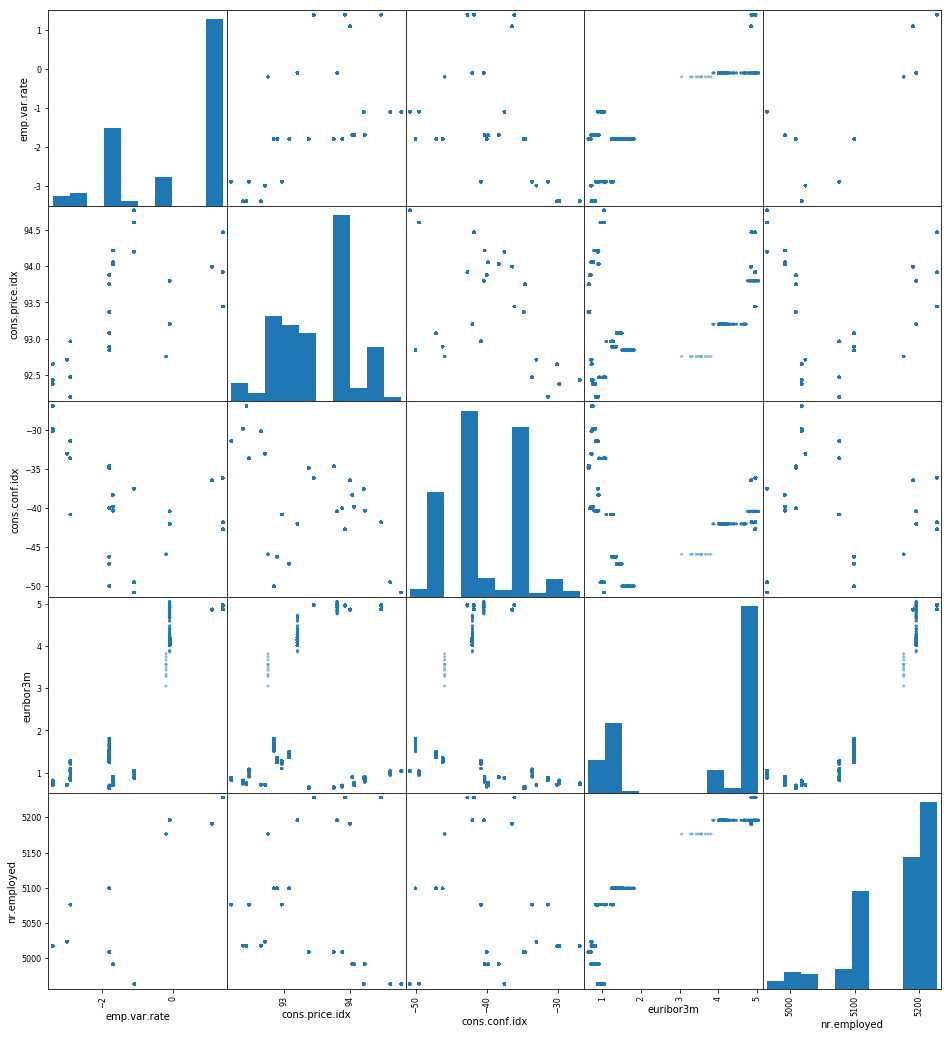

In [149]:
bank_se.corr()
s=scatter_matrix(bank_se,figsize=(16,18))

### Feature Engineering

In [150]:
#Binning emp.var.rate column
def se(data):
    data.loc[data['emp.var.rate'] > 0.1, 'emp.var.rate'] = 3
    data.loc[data['emp.var.rate'] <= -1.8, 'emp.var.rate'] = 1
    data.loc[(data['emp.var.rate'] > -1.8) & (data['emp.var.rate'] <= 0.1)  , 'emp.var.rate']    = 2
    return data
se(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,-36.4,4.857,5191.0
1,3.0,93.994,-36.4,4.857,5191.0
2,3.0,93.994,-36.4,4.857,5191.0
3,3.0,93.994,-36.4,4.857,5191.0
4,3.0,93.994,-36.4,4.857,5191.0
5,3.0,93.994,-36.4,4.857,5191.0
6,3.0,93.994,-36.4,4.857,5191.0
7,3.0,93.994,-36.4,4.857,5191.0
8,3.0,93.994,-36.4,4.857,5191.0
9,3.0,93.994,-36.4,4.857,5191.0


In [151]:
bank_se['emp.var.rate'].value_counts()

3.0    23997
1.0    12090
2.0     5101
Name: emp.var.rate, dtype: int64

#Consumer Confidence Index- Binning-Levels - {<-46.2, [-46.2,-36.4),>-36.4

In [152]:
 def sse(data):
    data.loc[data['cons.conf.idx'] > (-36.4), 'cons.conf.idx'] = 3
    data.loc[data['cons.conf.idx'] <= (-46.2), 'cons.conf.idx'] = 1
    data.loc[(data['cons.conf.idx'] > (-46.2)) & (data['cons.conf.idx'] <= (-36.4))  , 'cons.conf.idx']    = 2
    return(data)
sse(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,2.0,4.857,5191.0
1,3.0,93.994,2.0,4.857,5191.0
2,3.0,93.994,2.0,4.857,5191.0
3,3.0,93.994,2.0,4.857,5191.0
4,3.0,93.994,2.0,4.857,5191.0
5,3.0,93.994,2.0,4.857,5191.0
6,3.0,93.994,2.0,4.857,5191.0
7,3.0,93.994,2.0,4.857,5191.0
8,3.0,93.994,2.0,4.857,5191.0
9,3.0,93.994,2.0,4.857,5191.0


In [153]:
bank_se['cons.conf.idx'].value_counts()

2.0    24518
1.0     8866
3.0     7804
Name: cons.conf.idx, dtype: int64

Binning Eurointerbanking offer Rate
{<1.3, [1.3,4.19), [4.19,4.96),>4.96}


In [154]:
def eub(data):
    data.loc[data['euribor3m']<1.3,'euribor3m']=1
    data.loc[(data['euribor3m']<4.19)&(data['euribor3m']>=1.3),'euribor3m']=2
    data.loc[(data['euribor3m']<4.96)&(data['euribor3m']>=4.19),'euribor3m']=3
    data.loc[(data['euribor3m']>=4.96)]=4
    return(data)
eub(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,2.0,3.0,5191.0
1,3.0,93.994,2.0,3.0,5191.0
2,3.0,93.994,2.0,3.0,5191.0
3,3.0,93.994,2.0,3.0,5191.0
4,3.0,93.994,2.0,3.0,5191.0
5,3.0,93.994,2.0,3.0,5191.0
6,3.0,93.994,2.0,3.0,5191.0
7,3.0,93.994,2.0,3.0,5191.0
8,3.0,93.994,2.0,3.0,5191.0
9,3.0,93.994,2.0,3.0,5191.0


In [155]:
bank_se['euribor3m'].value_counts()

4.0    12706
3.0    12026
1.0     8636
2.0     7820
Name: euribor3m, dtype: int64

In [156]:
#Binning Consumer Price Index
def cci(data):
    data.loc[data['cons.price.idx']<93.06,'cons.price.idx']=1
    data.loc[(data['cons.price.idx']>93.06)& (data['cons.price.idx']<93.91),'cons.price.idx']=2
    data.loc[(data['cons.price.idx']>93.91),'cons.price.idx']=3
    return(data)
cci(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,3.0,2.0,3.0,5191.0
1,3.0,3.0,2.0,3.0,5191.0
2,3.0,3.0,2.0,3.0,5191.0
3,3.0,3.0,2.0,3.0,5191.0
4,3.0,3.0,2.0,3.0,5191.0
5,3.0,3.0,2.0,3.0,5191.0
6,3.0,3.0,2.0,3.0,5191.0
7,3.0,3.0,2.0,3.0,5191.0
8,3.0,3.0,2.0,3.0,5191.0
9,3.0,3.0,2.0,3.0,5191.0


Binning no of employee column
- {<5099.1, [5099.1,5191.02), >5191.02}


In [157]:
def ne(data):
    data.loc[data['nr.employed']<5099.1,'nr.employed']=1
    data.loc[(data['nr.employed']>=5099.1)&(data['nr.employed']<5191.02)]=2
    data.loc[data['nr.employed']>=5191.02]=3
    return (data)
ne(bank_se)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0
6,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0,2.0
9,2.0,2.0,2.0,2.0,2.0


### EDA-Part 4

In [158]:
#Other Attributes
bank_o = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [159]:
#Analysing pdays
print(bank_o['pdays'].nunique())
d=bank_o['pdays'].value_counts()
print(d)

27
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


In [160]:
def pdays(data):
    data.loc[data['pdays']==999,'pdays_new']='never_contacted'
    data.loc[data['pdays']!=999,'pdays_new']='contacted_before'
    return (data)
pdays(bank_o)

,campaign,pdays,previous,poutcome,pdays_new
0,1,999,0,nonexistent,never_contacted
1,1,999,0,nonexistent,never_contacted
2,1,999,0,nonexistent,never_contacted
3,1,999,0,nonexistent,never_contacted
4,1,999,0,nonexistent,never_contacted
5,1,999,0,nonexistent,never_contacted
6,1,999,0,nonexistent,never_contacted
7,1,999,0,nonexistent,never_contacted
8,1,999,0,nonexistent,never_contacted
9,1,999,0,nonexistent,never_contacted


In [161]:
bank_o['pdays_new'].value_counts()

never_contacted     39673
contacted_before     1515
Name: pdays_new, dtype: int64

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


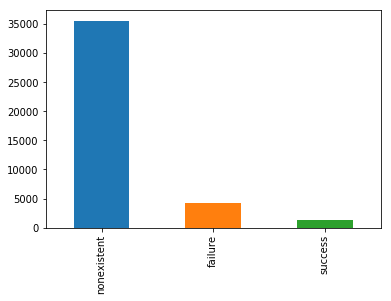

In [162]:
#Analysing outcomes of campaign
p=bank_o['poutcome'].value_counts()
print(p)
p.plot.bar()

In [163]:
#LAbel Encoding for poutcome and pdays
# Import label encoder 
#from sklearn import preprocessing 
#labels=preprocessing.LabelEncoder() 
#bank_o['poutcome']=labels.fit_transform(bank_o['poutcome'])
cat_vars=['pdays_new','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank_o[var], prefix=var)
    data1=bank_o.join(cat_list)
    bank_o=data1
cat_vars=['pdays_new','poutcome']
data_vars=bank_o.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [164]:
bank_o_final=bank_o[to_keep]
bank_o_final.columns.values

array(['campaign', 'pdays', 'previous', 'pdays_new_contacted_before',
       'pdays_new_never_contacted', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'], dtype=object)

In [165]:
bank_o_final.drop(['pdays'],axis=1,inplace=True)

In [166]:
#Data Modeling
bank_final= pd.concat([bank_client_final, bank_related_final, bank_se, bank_o_final], axis = 1)
bank_final.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,duration,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,previous,pdays_new_contacted_before,pdays_new_never_contacted,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,2.0,1,0,0,1,0,1,0
1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,2.0,1,0,0,1,0,1,0
2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,2.0,1,0,0,1,0,1,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,2.0,1,0,0,1,0,1,0
4,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.0,2.0,2.0,2.0,2.0,1,0,0,1,0,1,0


In [167]:
bank_final.drop(['duration'],axis=1,inplace=True)

In [168]:
bank_final.shape

(41188, 63)

In [169]:
bank_final.dtypes

age                                int64
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_divorced                   uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.4y                 uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.school              uint8
education_illiterate               uint8
education_professional.course      uint8
education_university.degree        uint8
education_unknow

In [170]:
#Converting Y-Response variable in binary
from sklearn.preprocessing import LabelEncoder
lbs=LabelEncoder()
data['y']=lbs.fit_transform(data['y'])

In [171]:
import statsmodels.api as sm
logit_model=sm.Logit(data['y'],bank_final[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297780
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.154     
Dependent Variable: y                AIC:              24543.9129
Date:               2019-06-11 08:23 BIC:              24604.2943
No. Observations:   41188            Log-Likelihood:   -12265.   
Df Model:           6                LL-Null:          -14499.   
Df Residuals:       41181            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0750   0.0207  -3.6328 0.0003 -0.1155 -0.0345
emp.var.rate     -0.7320   0.1763  -4.1512 0.0000 -1.0777 -0.3864


In [172]:
#importing necessary packages
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,BaggingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [173]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, data.y, test_size = 0.2, random_state = 101)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [174]:
X_train.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,previous,pdays_new_contacted_before,pdays_new_never_contacted,poutcome_failure,poutcome_nonexistent,poutcome_success
39577,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,2.0,2.0,1.0,1.0,1,2,0,1,1,0,0
10104,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3.0,3.0,3.0,3.0,3.0,1,0,0,1,0,1,0
17235,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4.0,1.0,4.0,4.0,1.0,4,0,0,1,0,1,0
20926,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.0,1.0,4.0,4.0,1.0,1,0,0,1,0,1,0
17626,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4.0,1.0,4.0,4.0,1.0,5,0,0,1,0,1,0


In [175]:
#Digging deeper into our y_train to check how much no's and y's are there
y_train.value_counts()

0    29269
1     3681
Name: y, dtype: int64

In [176]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  58538
Number of no subscription in oversampled data 29269
Number of subscription 29269
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [189]:
X_train=os_data_X
y_train=os_data_y

In [190]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(LOGCV)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[6181 1098]
 [ 380  579]]
82.0


In [191]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier() 
tree.fit(X_train,y_train)
treepred=tree.predict(X_test)

print(confusion_matrix(y_test, treepred))
print(round(accuracy_score(y_test, treepred),2)*100)
treeCV = (cross_val_score(tree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(treeCV)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[[6618  661]
 [ 656  303]]
84.0
0.9103658935573995


In [192]:
#Trying Bagging 
param_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9,11,13]}
best_tree=GridSearchCV(estimator=tree,param_grid=param_tree,scoring='accuracy',n_jobs=-1,cv=5)
best_tree.fit(X_train,y_train)
BesttreeCV = (cross_val_score(best_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BesttreeCV)
bag=BaggingClassifier(base_estimator=best_tree.best_estimator_)
bagging_param={'n_estimators':[20,50,100,200]}
best_bag_tree=GridSearchCV(estimator=bag,param_grid=bagging_param,scoring='accuracy',cv=5,n_jobs=-1)
best_bag_tree.fit(X_train,y_train)
bagpred=best_bag_tree.predict(X_test)

print(confusion_matrix(y_test, bagpred))
print(round(accuracy_score(y_test, bagpred),2)*100)
BagtreeCV = (cross_val_score(best_bag_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BagtreeCV)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13]},
             pre_d

0.8752603254160365


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=13,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                     

[[6814  465]
 [ 517  442]]
88.0
0.900303997301849


In [180]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_validate(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = {'accuracy','f1'}))
print(RFCCV)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[7048  231]
 [ 683  276]]
89.0
{'fit_time': array([9.51058125, 9.75095534, 9.31222987, 9.25217795, 9.23410702,
       9.23955607, 9.35196972, 9.29660344, 9.50831866, 9.36101246]), 'score_time': array([0.53559828, 0.48436165, 0.49998069, 0.4843595 , 0.48436093,
       0.49999046, 0.48436165, 0.4843626 , 0.49185538, 0.48436046]), 'test_f1': array([0.40202703, 0.35314092, 0.34856176, 0.35984848, 0.3567753 ,
       0.37591241, 0.30508475, 0.37458194, 0.3670669 , 0.34494774]), 'test_accuracy': array([0.89256449, 0.88437026, 0.8831563 , 0.89742033, 0.8861912 ,
       0.89620637, 0.88801214, 0.88649469, 0.88801214, 0.88588771])}


In [181]:
#AdaBoosting Tree Classifier
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
adbprd = adb.predict(X_test)

print(confusion_matrix(y_test, adbprd ))
print(round(accuracy_score(y_test, adbprd),2)*100)
ADB = (cross_val_score(estimator = adb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print(ADB)
#Xgboost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print(XGB)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

[[7171  108]
 [ 744  215]]
90.0
0.8983613447932477


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

[[7198   81]
 [ 755  204]]
90.0
0.900243002100374


Text(0.5,1,'Receiver Operating Characteristic Logistic ')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

Text(0.5,1,'Receiver Operating Characteristic Bagging-Tree ')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

Text(0.5,1,'Receiver Operating Characteristic Random Forest ')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

Text(0.5,1,'Reciever Operating Characterstic XGBoost')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

Text(0.5,1,'Reciever Operating Characterstic AdaBoost')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

Text(0.5,1,'Receiver Operating Comparison ')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

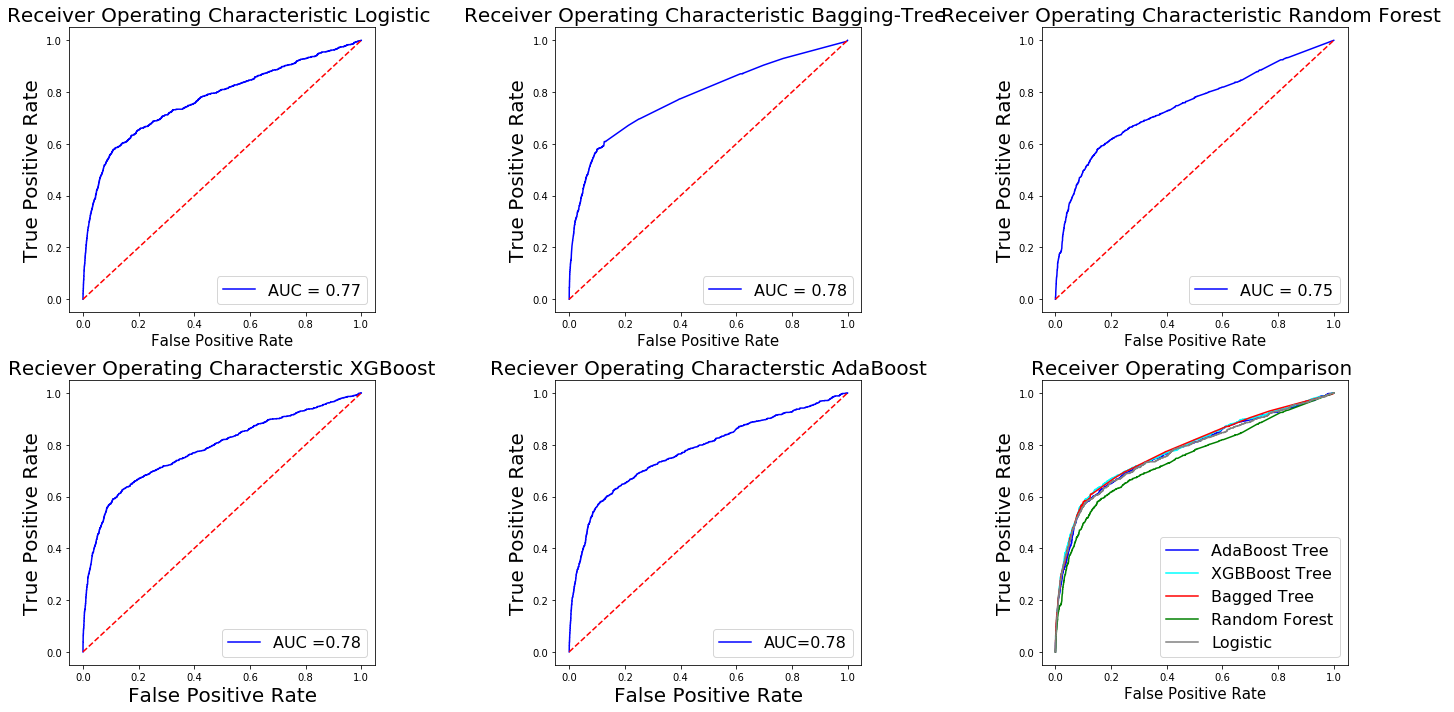

In [182]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})
#Bagging Model
probs = best_bag_tree.predict_proba(X_test)
preds = probs[:,1]
fprbg, tprbg, thresholdbg = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprbg, tprbg)

ax_arr[0,1].plot(fprbg, tprbg, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Bagging-Tree ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})



#RANDOM FOREST 
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
probs=xgb.predict_proba(X_test)
preds=probs[:,1]
fprxgb,tprxgb,thresholdxgb=metrics.roc_curve(y_test,preds)
roc_aucxgb=metrics.auc(fprxgb,tprxgb)

ax_arr[1,0].plot(fprxgb,tprxgb,'b',label='AUC =%0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title("Reciever Operating Characterstic XGBoost", fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel("False Positive Rate", fontsize=20)
ax_arr[1,0].legend(loc="lower right",prop={'size' :16})


#Adaptive Boosting
probs=adb.predict_proba(X_test)
preds=probs[:,1]
fpradb,tpradb,thresholdadb=metrics.roc_curve(y_test,preds)
roc_aucadb=metrics.auc(fpradb,tpradb)

ax_arr[1,1].plot(fpradb,tpradb,'b',label='AUC=%0.2f' % roc_aucadb)
ax_arr[1,1].plot([0,1],[0,1],'r--')
ax_arr[1,1].set_title('Reciever Operating Characterstic AdaBoost',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,1].legend(loc='lower right',prop={'size':16})


#Combining All 
ax_arr[1,2].plot(fpradb,tpradb,'b',label="AdaBoost Tree",color='blue')
ax_arr[1,2].plot(fprxgb,tprxgb,'b',label="XGBBoost Tree",color='cyan')
ax_arr[1,2].plot(fprbg,tprbg,'b',label="Bagged Tree",color='red')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# Analysing the Results

So now we have to decide which one is the best model, and we have two types of false values:

False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
In my opinion:

The first one is most harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaings
The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.

In [183]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn import metrics

Text(0.5,1,'Precision Recall Curve Logistic ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

Text(0.5,1,'Precision-Recall Curve Bagging-Tree ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

Text(0.5,1,'Precision-Recall Curve Random Forest ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

Text(0.5,1,'Precision-Recall Curve AdaBoost Model ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

Text(0.5,1,'Precision-Recall Curve XGBoost Model ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

Text(0.5,1,'Precision-Recall Curve ')

Text(0,0.5,'Recall')

Text(0.5,0,'Precision')

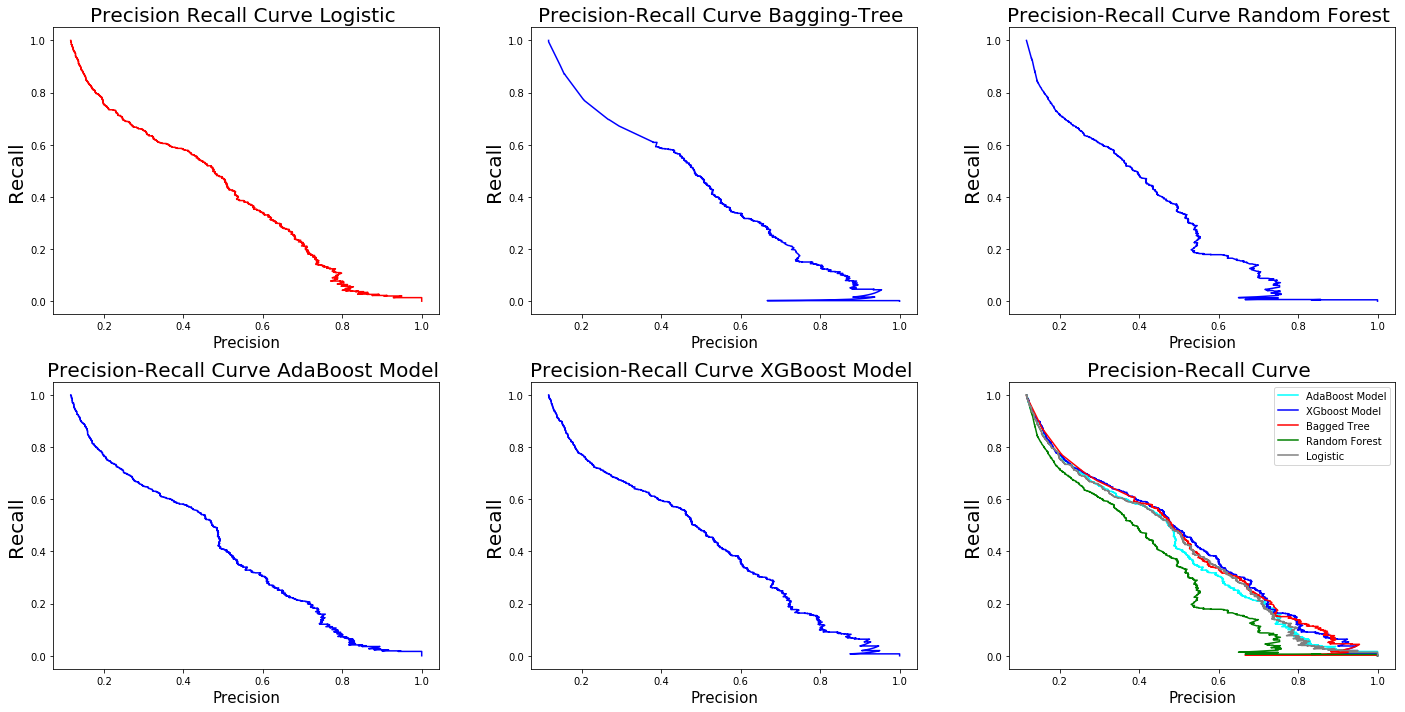

In [184]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
yhat = logmodel.predict(X_test)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
ax_arr[0,0].plot(precision,recall,'r')
ax_arr[0,0].set_title('Precision Recall Curve Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('Recall',fontsize=20)
ax_arr[0,0].set_xlabel('Precision',fontsize=15)

#Bagging Model
probs = best_bag_tree.predict_proba(X_test)
preds = probs[:,1]
pbg, rbg, thresholdbg = precision_recall_curve(y_test, preds)

ax_arr[0,1].plot(pbg, rbg, 'b' )
ax_arr[0,1].set_title('Precision-Recall Curve Bagging-Tree ',fontsize=20)
ax_arr[0,1].set_ylabel('Recall',fontsize=20)
ax_arr[0,1].set_xlabel('Precision',fontsize=15)

#RANDOM FOREST 
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
prrfc, rrfc, thresholdrfc = metrics.precision_recall_curve(y_test, preds)


ax_arr[0,2].plot(prrfc, rrfc, 'b' )
ax_arr[0,2].set_title('Precision-Recall Curve Random Forest ',fontsize=20)
ax_arr[0,2].set_ylabel('Recall',fontsize=20)
ax_arr[0,2].set_xlabel('Precision',fontsize=15)

#AdaBoost Model
probs = adb.predict_proba(X_test)
preds = probs[:,1]
pradb, radb, thresholdadb = metrics.precision_recall_curve(y_test, preds)


ax_arr[1,0].plot(pradb, radb, 'b' )
ax_arr[1,0].set_title('Precision-Recall Curve AdaBoost Model ',fontsize=20)
ax_arr[1,0].set_ylabel('Recall',fontsize=20)
ax_arr[1,0].set_xlabel('Precision',fontsize=15)

#XGboost Model
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
prxgb, rxgb, thresholdxgb = metrics.precision_recall_curve(y_test, preds)


ax_arr[1,1].plot(prxgb, rxgb, 'b' )
ax_arr[1,1].set_title('Precision-Recall Curve XGBoost Model ',fontsize=20)
ax_arr[1,1].set_ylabel('Recall',fontsize=20)
ax_arr[1,1].set_xlabel('Precision',fontsize=15)

#Combinig Models
ax_arr[1,2].plot(pradb,radb,'b',label="AdaBoost Model",color='cyan')
ax_arr[1,2].plot(prxgb,rxgb,'b',label='XGboost Model',color='blue')
ax_arr[1,2].plot(pbg,rbg,'b',label="Bagged Tree",color='red')
ax_arr[1,2].plot(prrfc, rrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(precision, recall, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Precision-Recall Curve ',fontsize=20)
ax_arr[1,2].set_ylabel('Recall',fontsize=20)
ax_arr[1,2].set_xlabel('Precision',fontsize=15)
ax_arr[1,2].legend(loc = 'upper right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [185]:
from sklearn.metrics import classification_report
print('Logistic Regression Reports\n',classification_report(y_test, logpred))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7279
           1       0.70      0.23      0.34       959

    accuracy                           0.90      8238
   macro avg       0.80      0.61      0.64      8238
weighted avg       0.88      0.90      0.87      8238



In [186]:
print('Bagging Report\n',classification_report(y_test,bagpred))

Bagging Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7279
           1       0.68      0.25      0.37       959

    accuracy                           0.90      8238
   macro avg       0.79      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



In [187]:
print('RandomForest Reports\n',classification_report(y_test, rfcpred))

RandomForest Reports
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7279
           1       0.54      0.29      0.38       959

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238



In [188]:
print('AdaBoost Reports\n',classification_report(y_test, adbprd))

AdaBoost Reports
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7279
           1       0.67      0.22      0.34       959

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



In [101]:
print('XGBoost Reports\n',classification_report(y_test, xgbprd))

XGBoost Reports
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       732
           1       0.52      0.17      0.26        92

    accuracy                           0.89       824
   macro avg       0.71      0.58      0.60       824
weighted avg       0.86      0.89      0.86       824



<Figure size 1440x1800 with 0 Axes>

Text(0.5,1,'Feature Importances')

<BarContainer object of 63 artists>

([<matplotlib.axis.YTick at 0x161827ea320>,
 <a list of 63 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

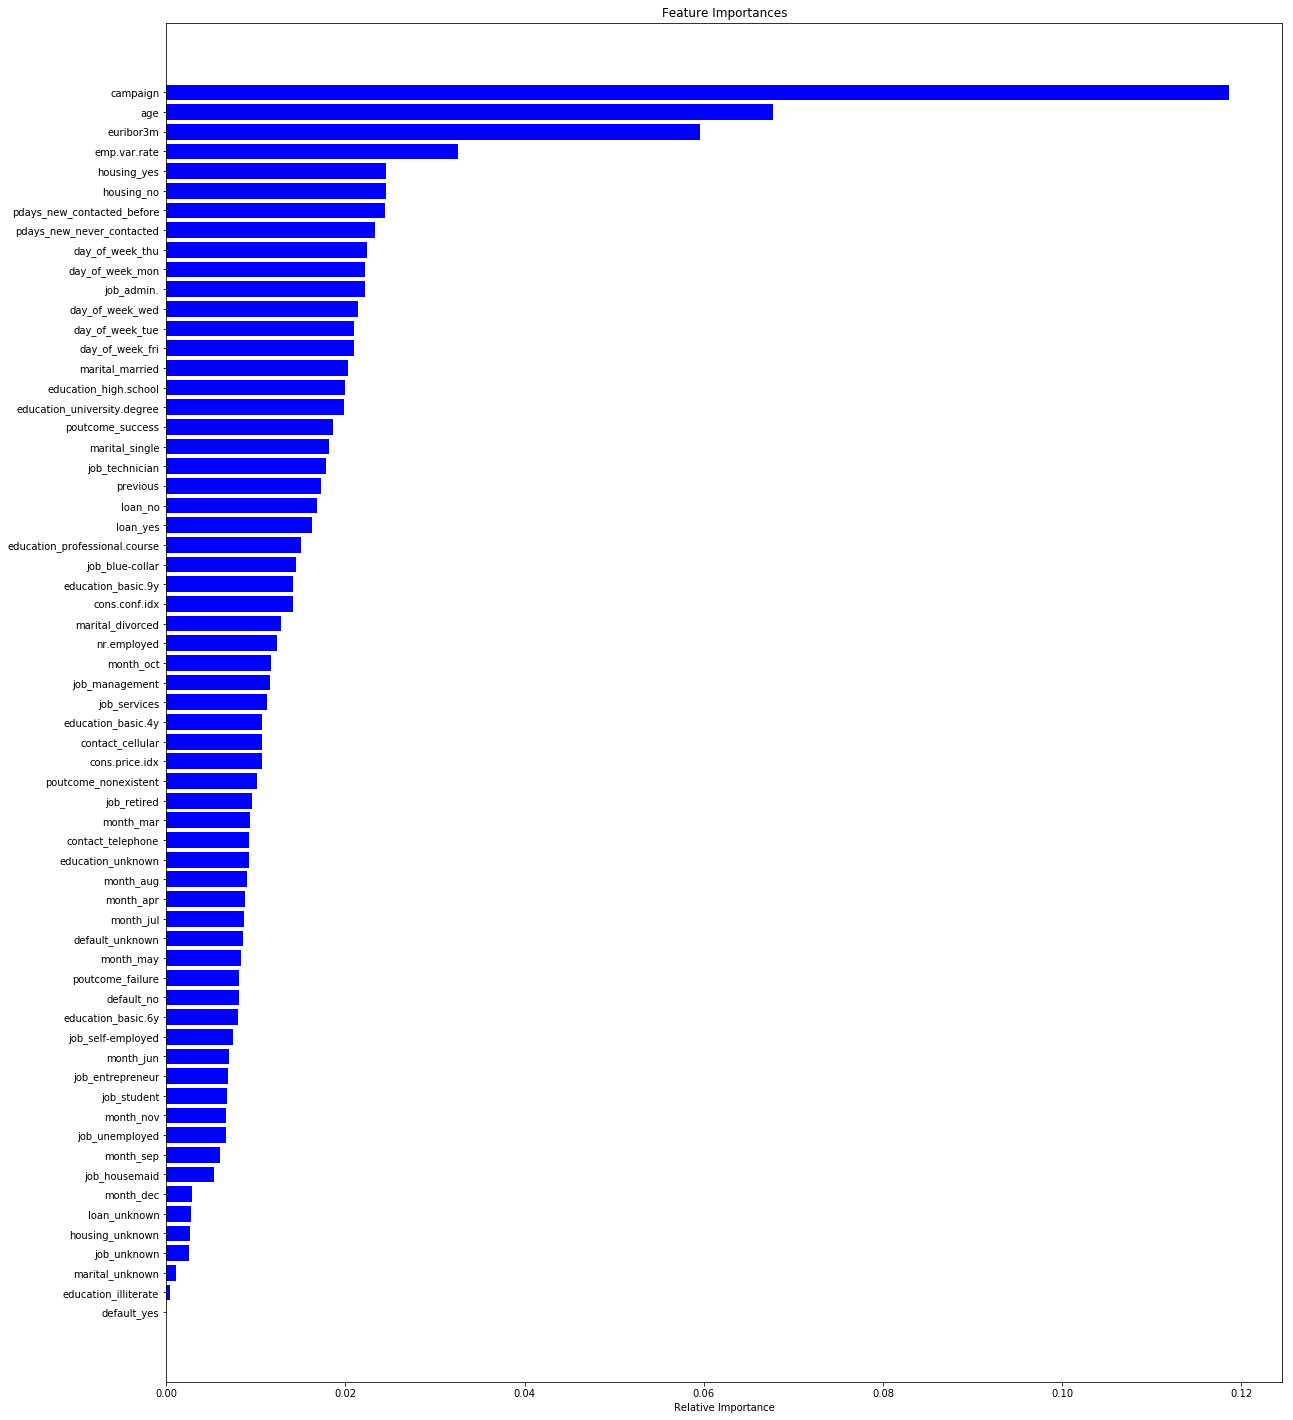

In [195]:
features=X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(1,figsize=(20,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')